In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
import numpy as np

y = y.astype(np.uint8)

In [5]:
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [143]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

# forest_clf.fit(X_train, y_train)

In [155]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)

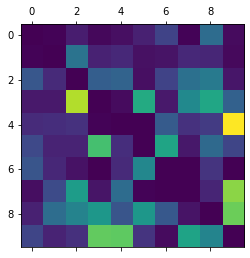

In [176]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

matrix = confusion_matrix(y_train, y_train_pred)

row_sums = matrix.sum(axis=1, keepdims=True)

norm_conf_mx = matrix / row_sums
np.fill_diagonal(norm_conf_mx, 0)

plt.matshow(norm_conf_mx)

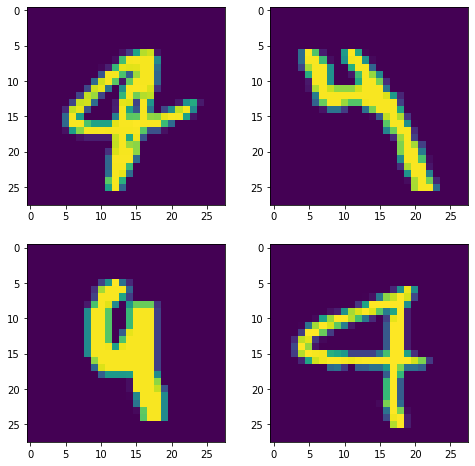

In [215]:
cl_a, cl_b = 4, 9

a_as_b = (y_train == cl_a) & (y_train_pred == 9)

plt.figure(figsize=(8,8))

plt.subplot(221)
plt.imshow(X_train[a_as_b].values[11].reshape(28, 28))

plt.subplot(222)
plt.imshow(X_train[a_as_b].values[21].reshape(28, 28))

plt.subplot(223)
plt.imshow(X_train[a_as_b].values[31].reshape(28, 28))

plt.subplot(224)
plt.imshow(X_train[a_as_b].values[41].reshape(28, 28))